In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [2]:
path = r'C:\Users\jinu5\Desktop\careerfoundry\ML\DataSet\original data'

In [3]:
df = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'), index_col=False)


In [4]:
# For training KNN model, reading the dataset which includes 'What day was pleasant in each locations?'
df_y = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col=False)

In [5]:
# listing the location names from df
locations_A = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations_A.sort()
locations_A

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'GDANSK',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'ROMA',
 'SONNBLICK',
 'STOCKHOLM',
 'TOURS',
 'VALENTIA']

In [6]:
# listing the location names from df_y
locations_B = list({x.split("_")[0] for x in df_y.columns if x not in ["MONTH", "DATE"]})
locations_B.sort()
locations_B

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [7]:
# finding the cities existing only in locations_A, not in locations_B
noname=[]
for i in locations_A:
    if i not in locations_B:
        noname.append(i)
noname

['GDANSK', 'ROMA', 'TOURS']

In [8]:
# delete columns that the city name is in noname list ['GDANSK', 'ROMA', 'TOURS']
for a in df.columns:
    name=a.split('_')[0]
    if name in noname:
        del df[a]

In [9]:
#check locations_A1 and locations_b
# listing the location names from df
locations_A1 = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
noname1=[]
for i in locations_A1:
    if i not in locations_B:
        noname1.append(i)
noname1

[]

In [10]:
#import new labrary
from sklearn.multioutput import MultiOutputClassifier

## KNN model

In [11]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df.drop(['DATE', 'MONTH'], axis=1)
y = df_y.drop(['DATE'], axis=1)

In [12]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [13]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [15]:
#### Scale the dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [16]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [17]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]


C:\Users\jinu5\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\jinu5\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

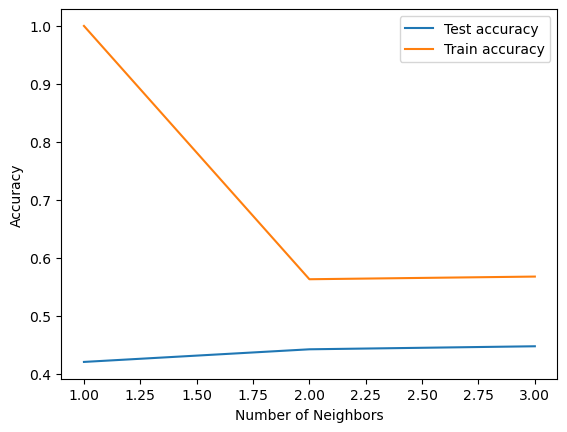

In [18]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

In [19]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [20]:
X_train

array([[-1.41107749, -0.03095027, -0.61660315, ...,  1.45475014,
         1.57581674,  1.16512065],
       [ 1.08186228, -0.58789342,  0.55778807, ..., -0.0139084 ,
        -0.0077553 , -0.00981651],
       [ 0.66637232, -0.866365  ,  0.73846364, ..., -2.92125284,
        -3.22950531, -2.18774879],
       ...,
       [ 0.25088236, -0.03095027,  0.55778807, ..., -0.34360725,
        -0.03505826, -0.58295658],
       [ 0.66637232, -0.03095027, -0.52626537, ...,  0.10598209,
         0.1560625 ,  0.0474975 ],
       [ 0.25088236, -0.44865764, -0.70694094, ..., -0.34360725,
        -0.49920869, -0.15310152]])

#### Training Set Confusion Matrix

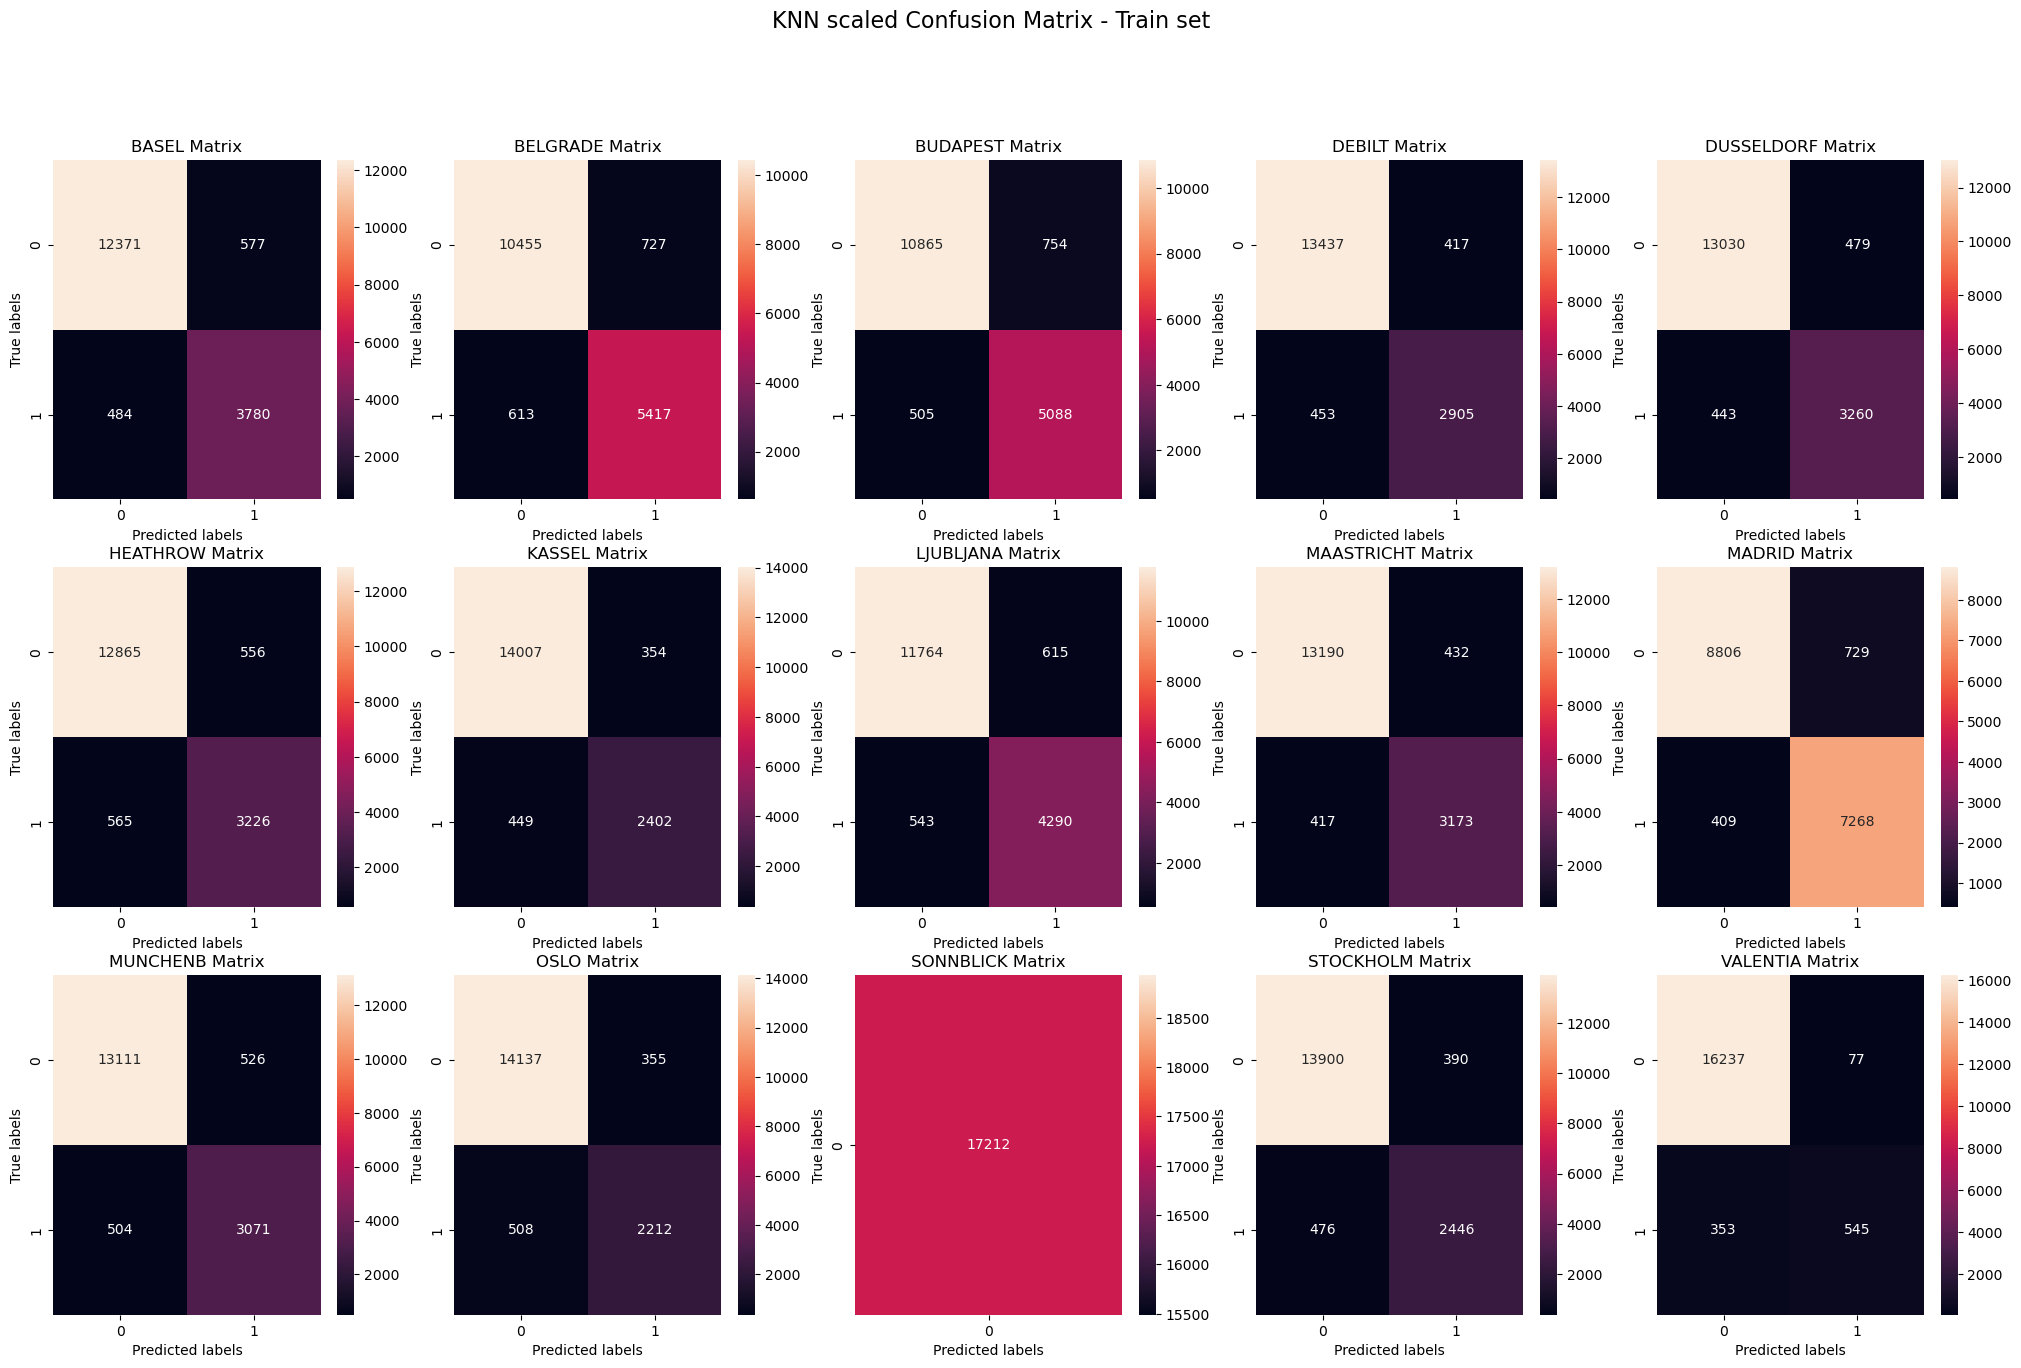

In [21]:
 y_pred_train = knn.predict(X_train)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
figure.suptitle('KNN scaled Confusion Matrix - Train set', fontsize=16)

labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
plt.savefig('KNN_train_confusion_matrix_scaled.png', bbox_inches='tight')
plt.show() 

### Test set Confusion Matrix

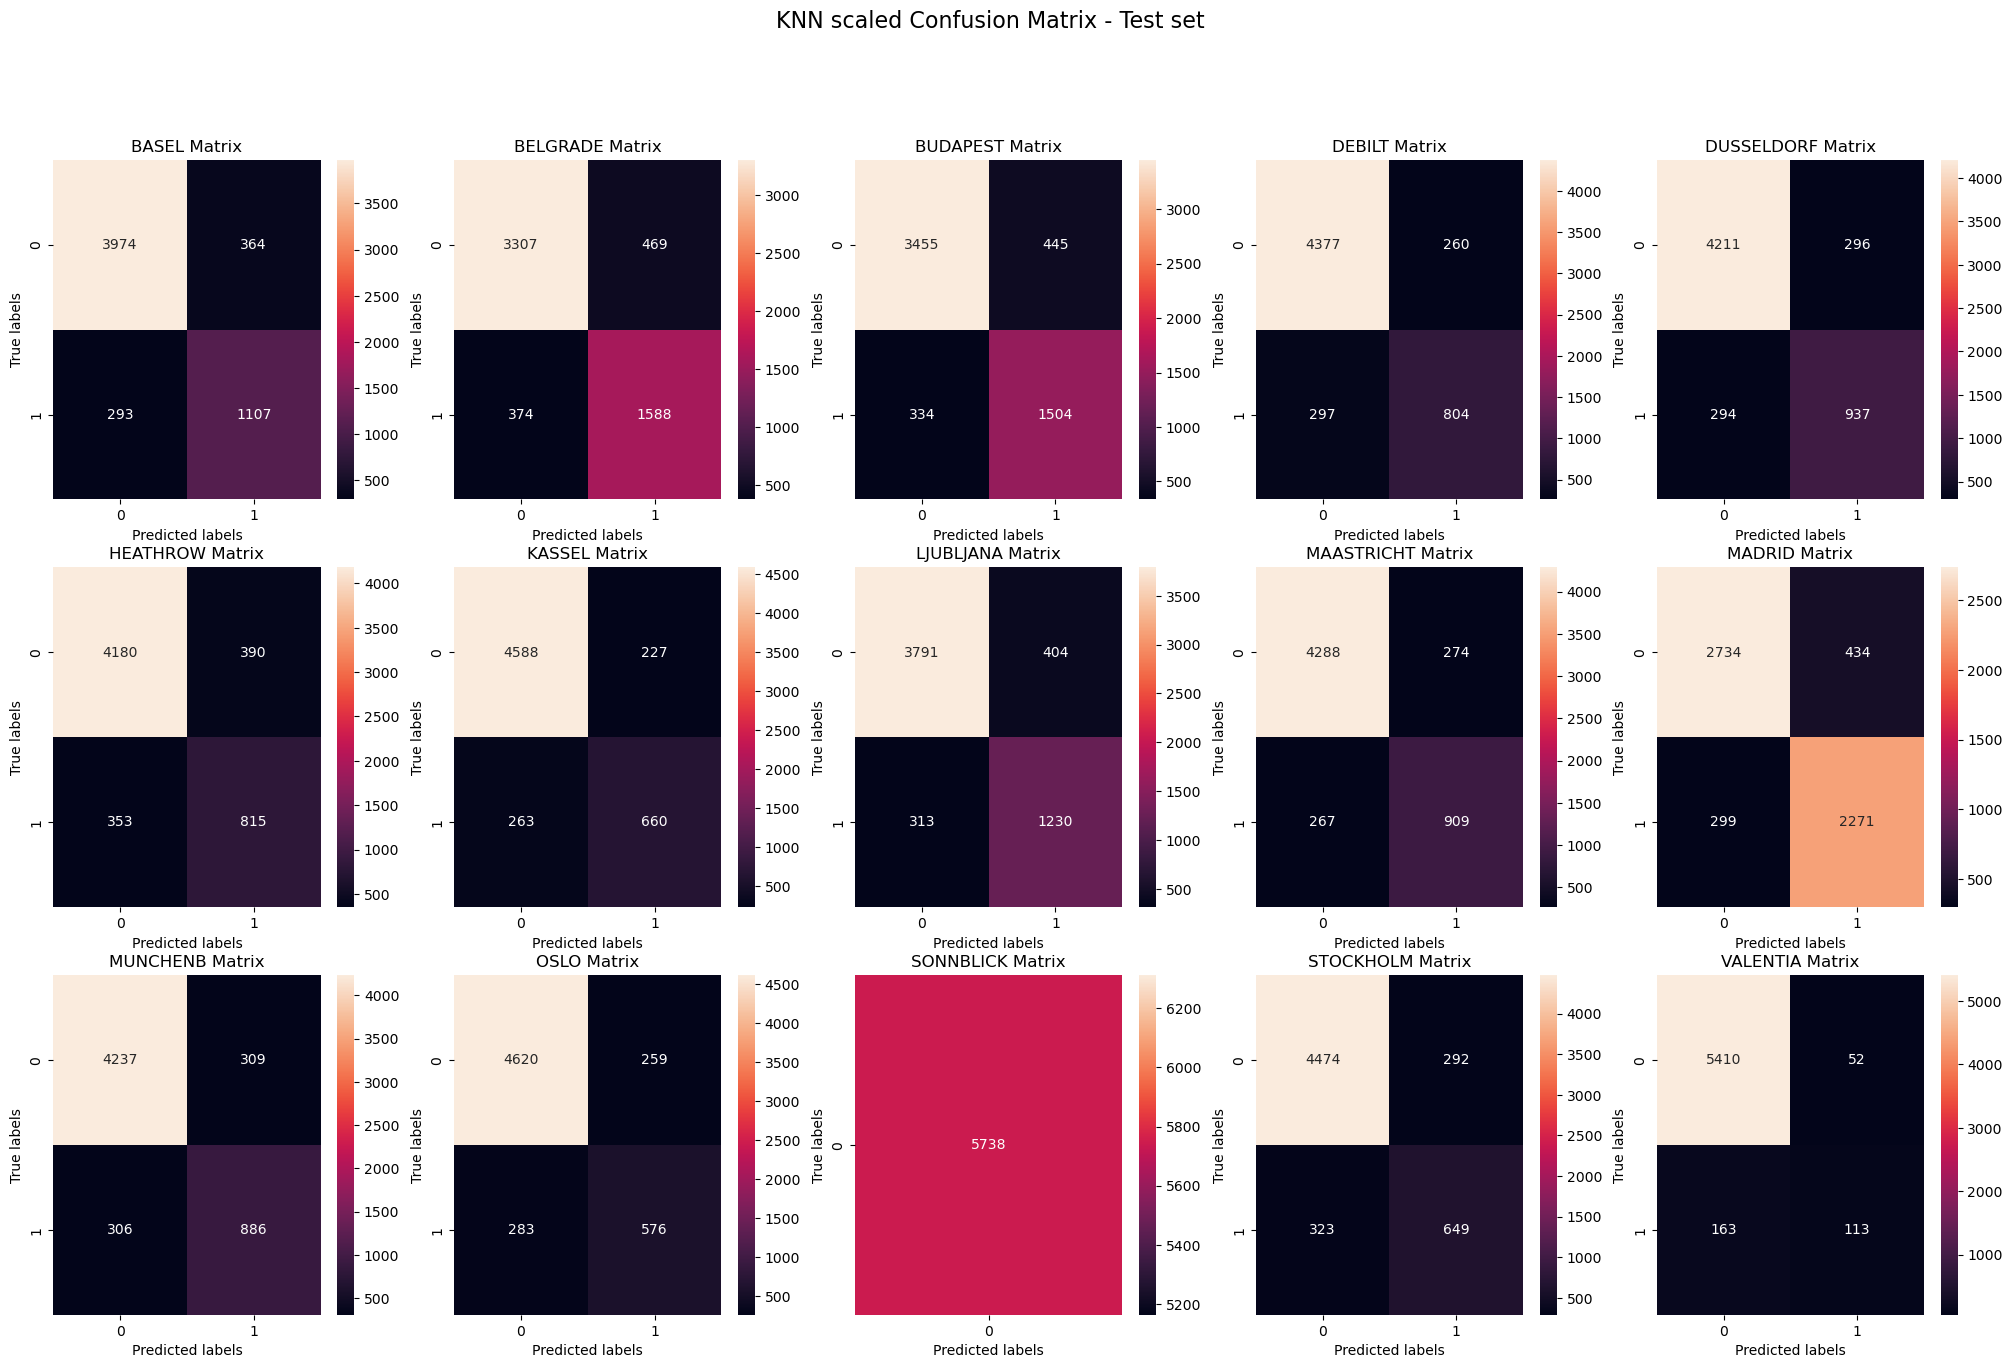

In [22]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
figure.suptitle('KNN scaled Confusion Matrix - Test set', fontsize=16)

labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
plt.savefig('KNN_test_confusion_matrix_scaled.png', bbox_inches='tight')
plt.show() 

### Calculate the accuracy

In [23]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train) 
accuracy_test = accuracy_score(y_test, y_pred)

print("Accuracy of KNN scaled, Train :", accuracy_train)
print("Accuracy of KNN scaled, Test :", accuracy_test)


Accuracy of KNN scaled, Train : 0.5674529398094352
Accuracy of KNN scaled, Test : 0.44719414430115023


## Answer for task questions
- ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
  #ax[i,j].yaxis.set_ticklabels(labels);y?
- How well does this algorithm predict the current data?
- Are any weather stations fully accurate? Is there any overfitting happening?-
- Are there certain features of the data set (such as particular weather stations) that might contribute to the overall accuracy or inaccuracy


1. Code Snippet C question:
The code is to label the plots with preset labels, but in the case of Sonniblick, there are only two labels but only one scale, which I suspect is causing errors. Sonniblick has bad weather every week, so there are no pleasant days since the weather measurement.

2. Weather forecasting via K-Nearest Neighbor (KNN) is more than 85% accurate, as shown by the chaos matrix for 15 cities. The highest accuracy is in Valentia (96%), while the lowest is in Belgrade (86%).

3. With the exception of Sonniblick, none of the weather stations are completely accurate.
A simple pleasant/unpleasant forecast is also not an easy one. Since Sonniblick doesn't have a pleasant record in its data, we can assume that some sort of overfitting has occurred.

4. Also, as the Sonniblick example shows, things like geographic location and altitude can affect the accuracy or inaccuracy of a weather forecast. Sonniblick is an extreme weather location. Located in the Austrian Alps, Sonniblick is covered in snow year-round. Valentia, the most accurate city, also has mild temperatures year-round, so its forecasts are more accurate. However, this analysis doesn't tell us how much certain conditions, such as wind speed, humidity, and barometric pressure, affect pleasant/unpleasant.